# 03. Text Analysis of Articles (Breast Cancer)

In [21]:
from matplotlib import pyplot as plt, font_manager, rc
from wordcloud import ImageColorGenerator, WordCloud
from konlpy.tag import Twitter
from PIL import Image
import numpy as np
import pandas as pd
import nltk
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
rc('font', family=font_name)
%matplotlib inline

def load_and_join_texts(file):
    df = pd.read_excel(file, encoding='utf-8')
    joined_texts = ''.join(df['Article'].tolist())
    return joined_texts

def tagging_and_cleaning(joined_text):
    twitter = Twitter()
    raw_pos_tagged = twitter.pos(joined_text, norm=True, stem=True)

    del_list = ['특히','가장','때문','성암','크다','보다','없다',
                '받다','많다','하다', '있다', '되다', '이다', '돼다',
                '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다', '여성'] 

    word_cleaned = []
    for word in raw_pos_tagged:
        if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]:
            if (len(word[0]) != 1) & (word[0] not in del_list): # exclude one letter word
                word_cleaned.append(word[0])
    return word_cleaned

def counts_words_dict(word_cleaned_list):
    word_dic = {}

    for word in word_cleaned_list:
        if word not in word_dic:
            word_dic[word] = 1 
        else:
            word_dic[word] += 1
    
    return word_dic

def show_lineplot(word_cleaned):
    word_counted = nltk.Text(word_cleaned) 
    plt.figure(figsize=(15, 7)) 
    word_counted.plot(50) # top 50 words

def show_barplot(word_cleaned):
    word_frequency = nltk.FreqDist(word_cleaned)
    df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 
    result = df.sort_values([0], ascending=False)
    top50 = result[:50]
    
    top50.plot(kind='bar', legend=False, figsize=(15,5)) 
    plt.show()
    
def show_wordcloud(word_count_dic, max_word_num):
    word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000,
                       max_words = max_word_num,
                       # prefer_horizontal= 1.0, 
                       background_color='white')
    
    word_cloud.generate_from_frequencies(word_count_dic)
    plt.figure(figsize=(15,15))  
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

def show_wordcloud(word_count_dic, max_word_num, mask_image):
    word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000,
                       max_words = max_word_num,
                       mask = mask_image,
                       # prefer_horizontal= 1.0, 
                       background_color='white').generate_from_frequencies(word_count_dic)
    
    plt.figure(figsize=(15,15)) 
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

def show_masked_wordcloud(img_arr, word_count_dic, max_word_num):
    # image_colors = ImageColorGenerator(img_arr)
    word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000,
                       max_words = max_word_num,
                       mask = img_arr,
                       # prefer_horizontal= 1.0, 
                       background_color='white').generate_from_frequencies(word_count_dic)
    
    plt.figure(figsize=(15,15)) 
    plt.imshow(word_cloud.recolor(colormap='Reds'), interpolation='bilinear')
    # plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

joined_txt = load_and_join_texts('result_190920_0959.xlsx')
cleaned_words = pos_tag_and_cleaning(joined_txt)
word_counts_dict = counts_words_dict(cleaned_words)

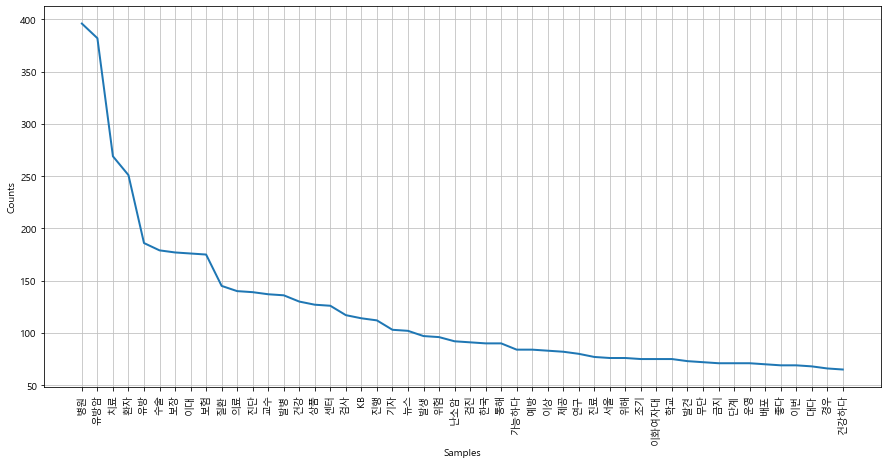

In [9]:
# top 50 words mostly used - lineplot
show_lineplot(cleaned_words)

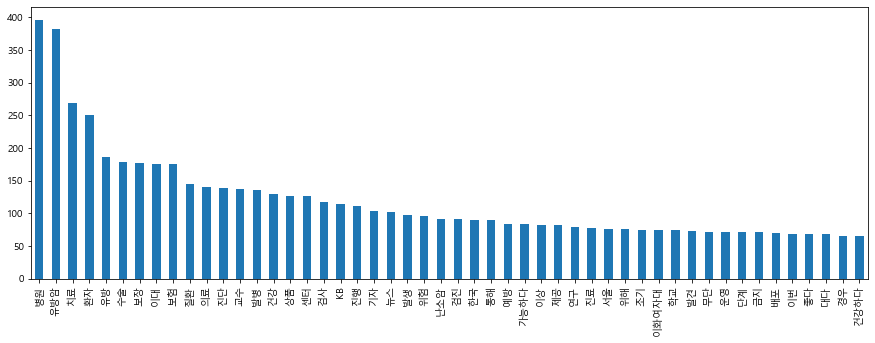

In [10]:
# top 50 words mostly used - barplot
show_barplot(cleaned_words)

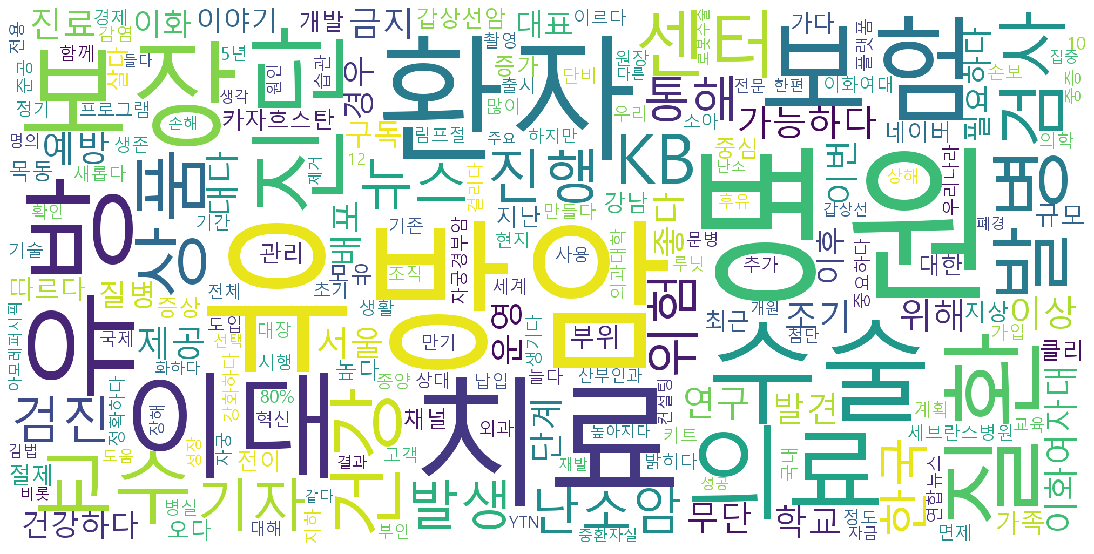

In [16]:
# top 200 words mostly used - wordcloud
show_Wordcloud(word_counts_dict, 200)

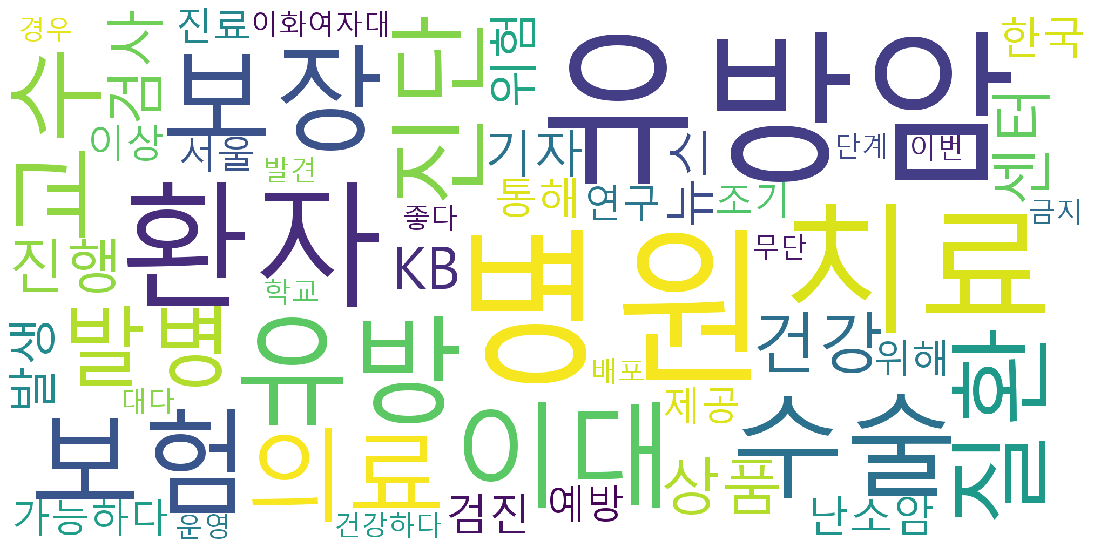

In [17]:
# top 50 mostly used - wordcloud
show_Wordcloud(word_counts_dict, 50)

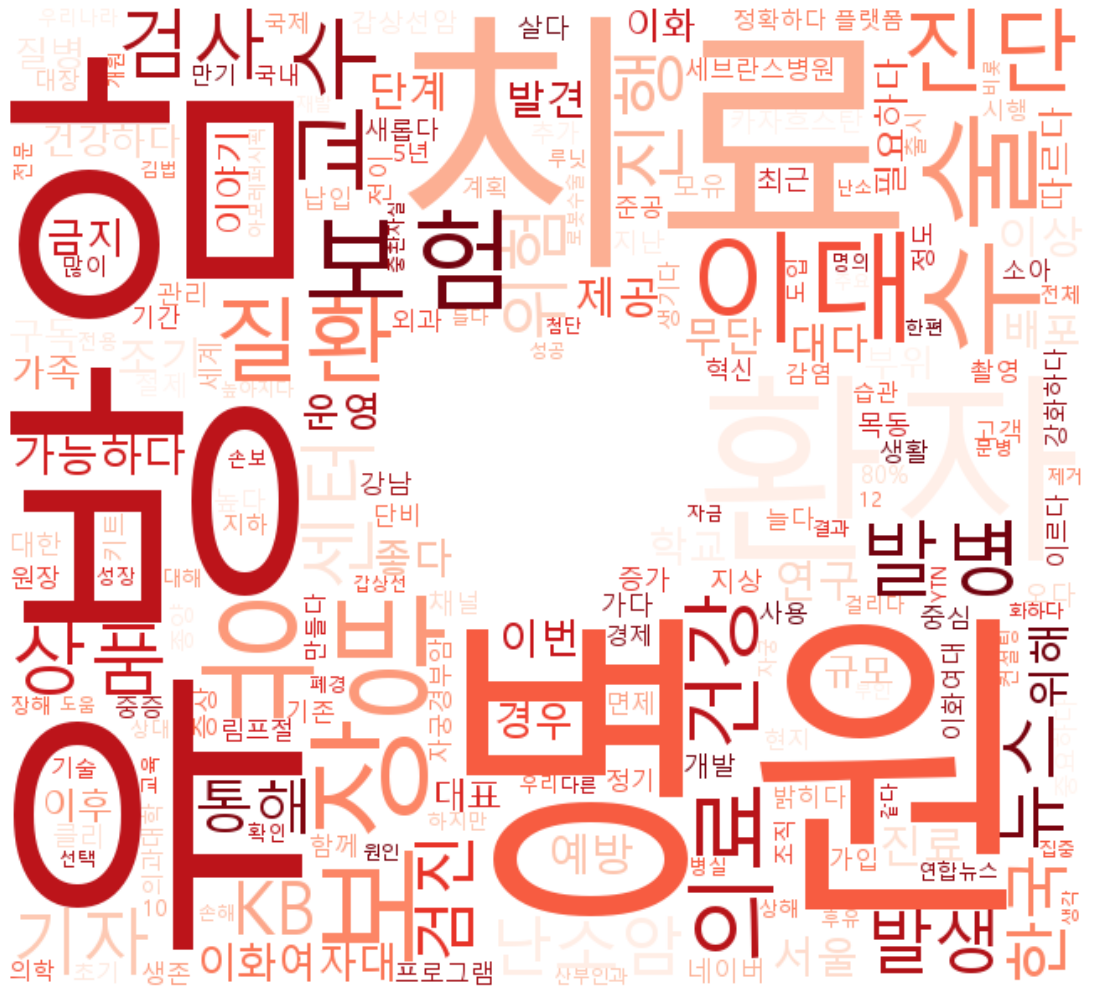

In [22]:
# 'heart_img' masked wordcloud
heart_coloring = np.array(Image.open("heart.png"))
show_masked_wordcloud(heart_coloring, word_counts_dict, 200)